# fraud Detection <img src="src/pattern-recognition.png" width=50 height=50/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amanalisiddiqui/fraud-detection-dataset")

df = pd.read_csv(path + "/AIML Dataset.csv")

Using Colab cache for faster access to the 'fraud-detection-dataset' dataset.


## EDA

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### inspecting the data

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe().round(2).astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


good, there are no null values and no duplicates in the dataset.

**as we know the best way to explore a dataset is to visualize it.**

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [11]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


from source of data :
- `isFraud` : whether the transaction is fraudulent or not.
- `isFlaggedFraud` : whether the transaction is flagged as fraudulent by the system or not.

##### I Noticed:
- the system detected only `16` fraudulent transactions out of `8213` fraudulent transactions, which means that the system is not very effective in detecting fraudulent transactions.

In [12]:


# perventage of fraud transactions to the total transactions
fraud_percentage = (df["isFraud"].value_counts()[1] / df.shape[0]) * 100
print(f"Percentage of fraudulent transactions in the dataset: {fraud_percentage:.2f}%")

Percentage of fraudulent transactions in the dataset: 0.13%


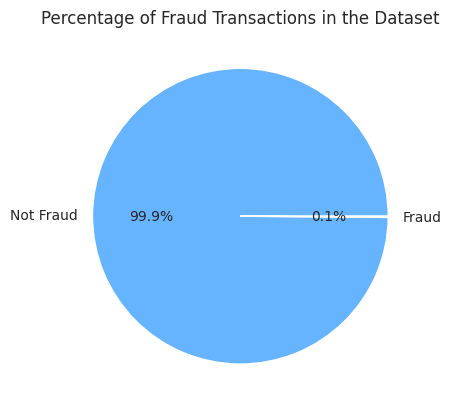

In [13]:
plt.pie(df["isFraud"].value_counts(), labels=["Not Fraud", "Fraud"], autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"])
plt.title("Percentage of Fraud Transactions in the Dataset")
plt.show()

In [14]:

# percentage of flagged fraud transactions to the total fraud transactions
flagged_fraud_percentage = (df["isFlaggedFraud"].value_counts()[1] / df["isFraud"].value_counts()[1]) * 100
print(f"Percentage of flagged fraudulent transactions among the fraudulent transactions: {flagged_fraud_percentage:.2f}%")

Percentage of flagged fraudulent transactions among the fraudulent transactions: 0.19%


- the old system just detected `0.19%` of the fraudulent transactions in the dataset, which is a very low percentage.

- type of Transaction

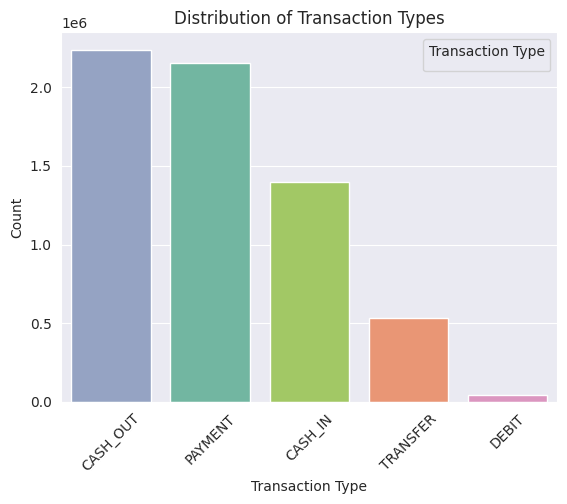

In [15]:
sns.countplot(data=df , x="type", hue="type", palette="Set2", order=df["type"].value_counts().index)
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(title="Transaction Type")
plt.xticks(rotation=45)
plt.show()

from graph:
    - the most common type of transaction is `CASH_OUT`, followed by `PAYMENT` and `TRANSFER`, while the least common type of transaction is `DEBIT`.

In [16]:
# fraud rate by transaction type
fraud_rate_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print("Fraud Rate by Transaction Type:")
print(fraud_rate_by_type)

Fraud Rate by Transaction Type:
type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


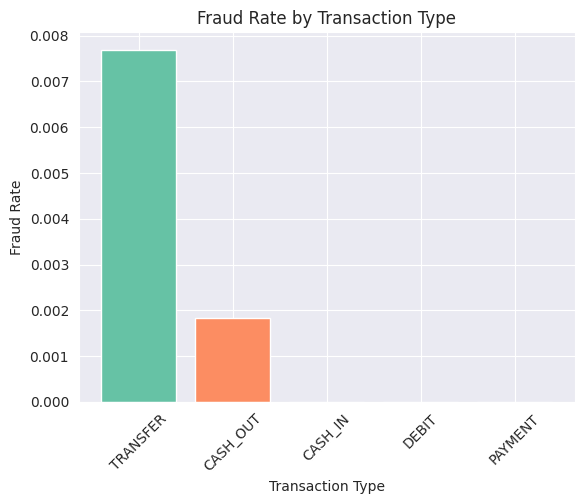

In [17]:
plt.bar(fraud_rate_by_type.index, fraud_rate_by_type.values, color=sns.color_palette("Set2"))
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

**from graph:** :pushpin:

- most of Fraud transactions happen in `TRANSFER` and `CASH_OUT`. :pin:

- summary statistics of amount column

In [18]:
# amount statistics :
df["amount"].describe().round(2).astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


In [19]:
df.loc[df["amount"] == 0].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0


there are some transactions with amount equal to `0`.

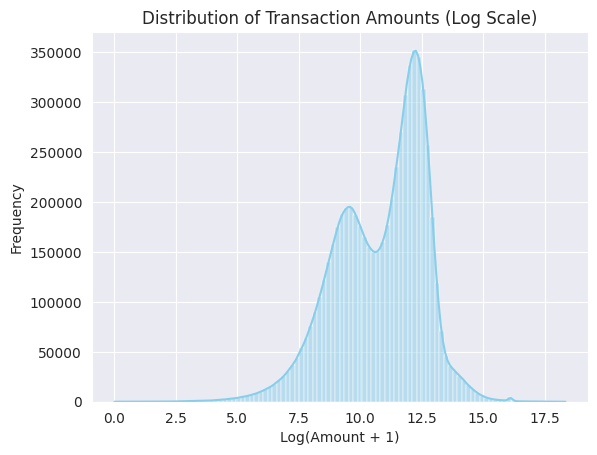

In [20]:
# see distribution of data

sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="skyblue")
plt.title("Distribution of Transaction Amounts (Log Scale)")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Frequency")
plt.show()

there are outliers in the amount column, as we can see from the distribution of the amount column.

**see the relationship of fraud and amount**

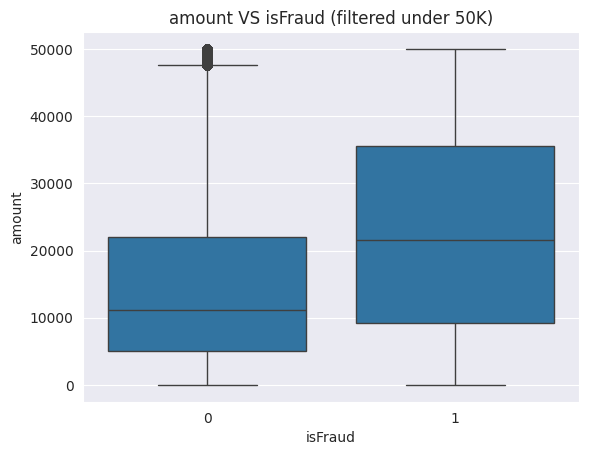

In [21]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("amount VS isFraud (filtered under 50K)")
plt.show()

- for the higher amount which filtered under 50K have more fraud rates 

see fraud per step

In [22]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()


Text(0, 0.5, 'num of Frauds')

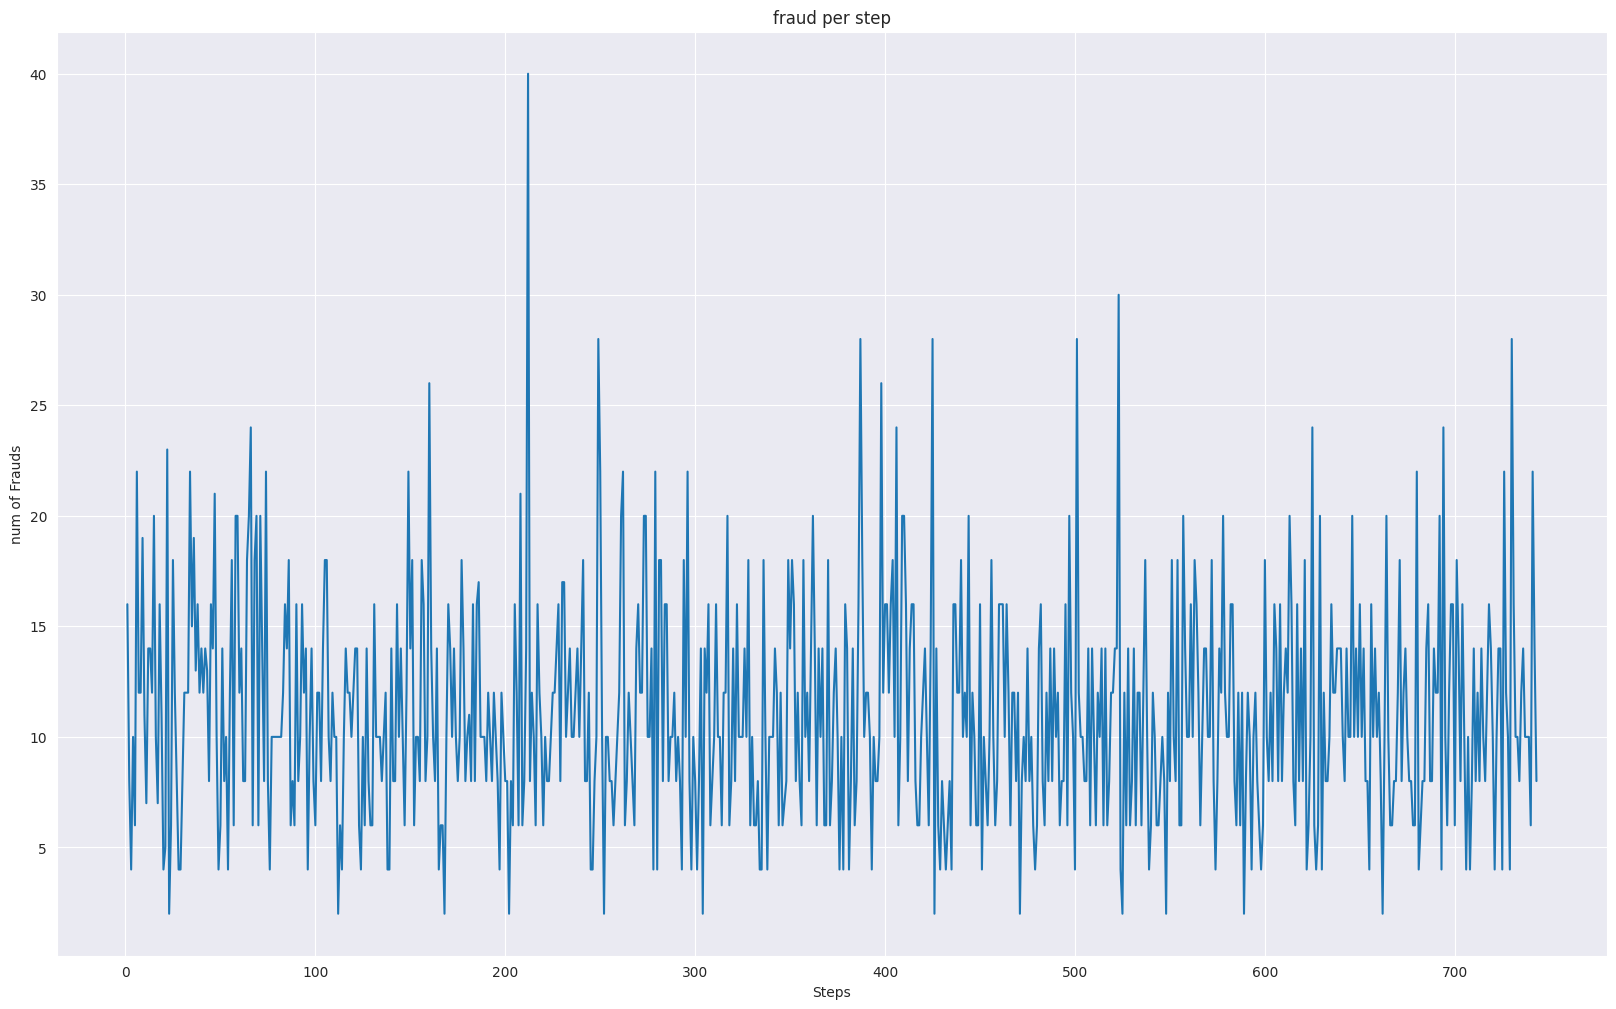

In [23]:
plt.figure(figsize=(20,12))
sns.lineplot(x=frauds_per_step.index, y=frauds_per_step.values)
plt.title("fraud per step")
plt.xlabel("Steps")
plt.ylabel("num of Frauds")

In [24]:
import plotly.io as pio
pio.renderers.default = "vscode"   

In [25]:
fig = px.line(x=frauds_per_step.index, y=frauds_per_step.values,title="fraud per step", labels={'x':"step", 'y':"fraud number"})



fig.show()

In [26]:
df.drop(columns="step", inplace=True)

**Customer wise**

- customers which makes highest amount of transactions -> Top senders & Top receivers.

In [27]:
top_senders = df["nameOrig"].value_counts().sort_values(ascending=False).head(10)

In [28]:
top_receivers = df["nameDest"].value_counts().sort_values(ascending=False).head(10)

In [29]:
top_senders

,count
nameOrig,
C1677795071,3
C724452879,3
C1462946854,3
C1784010646,3
C1902386530,3
C1976208114,3
C363736674,3
C2051359467,3
C545315117,3


In [30]:
top_receivers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C1590550415,101
C248609774,101
C1789550256,99
C451111351,99
C1360767589,98


- users that make fraud

In [31]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().sort_values(ascending=False).head(10)

In [32]:
fraud_users

,count
nameOrig,
C1118430673,1
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C1674778854,1
C43545501,1
C959102961,1
C1148860488,1


- analyze Transfer and cashout, becouse there have most fraud.

In [33]:
fraud_types = df[df["type"].isin(['TRANSFER','CASH_OUT'])]

In [34]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


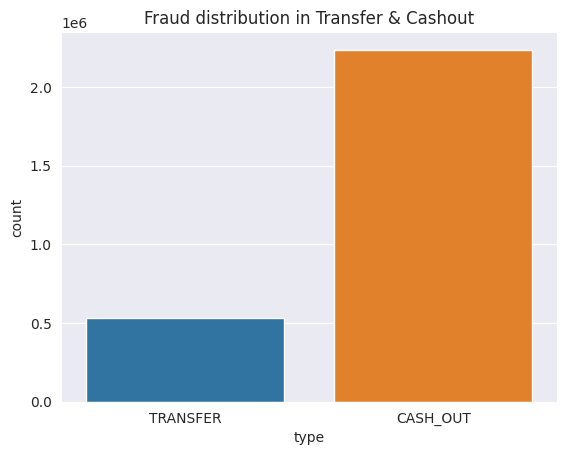

In [35]:
sns.countplot(data=fraud_types, x="type", hue="type")
plt.title("Fraud distribution in Transfer & Cashout")
plt.show()

see relations in numerical columns

In [36]:
numerical_col = df.select_dtypes(include="number")

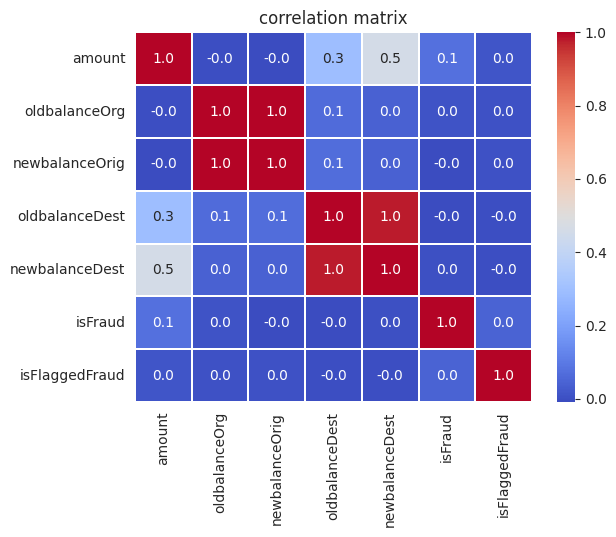

In [37]:
sns.heatmap(numerical_col.corr(), annot=True, linewidths=0.3, cmap="coolwarm",fmt=".1f")
plt.title("correlation matrix")
plt.show()

In [38]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

**Noticed:**
the next have a height 
- newbalanceDest & amount
- newbalanceDest & oldbalanceDest


**customers that have balanced after transfer equal to zero**

In [39]:
zero_after_transfer=df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0 ) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))

]

In [40]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


## Model Building <img src="src/coding.png" alt="under construction" width=30 height=30/>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [42]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Feature selection

In [43]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [44]:
df_model = df.loc[: , ['type', 'amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFraud']]
df_model.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [45]:
lab = LabelEncoder()
scale = StandardScaler()
cls = LogisticRegression(class_weight="balanced", max_iter=1000)

In [46]:
df_model["amount"] = scale.fit_transform(df_model[["amount"]])
df_model["oldbalanceOrg"] = scale.fit_transform(df_model[["oldbalanceOrg"]])
df_model["newbalanceOrig"] = scale.fit_transform(df_model[["newbalanceOrig"]])
df_model["oldbalanceDest"] = scale.fit_transform(df_model[["oldbalanceDest"]])
df_model["newbalanceDest"] = scale.fit_transform(df_model[["newbalanceDest"]])

In [47]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0
1,PAYMENT,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0
2,TRANSFER,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1
3,CASH_OUT,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1
4,PAYMENT,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0


In [48]:
df_model["type"]=lab.fit_transform(df[['type']])

In [49]:
y = df_model["isFraud"]
X = df_model.drop(columns="isFraud", axis=1)


### splitting data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
cls.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(cls, f)

<h4 align="center">The End</h4>